# Importing libraries for Decision Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

# Importing the scaled dataset and weather answers

In [2]:
#creating a path to the scaled dataset
path=r"C:\Users\Sam\Desktop\CF\Machine Learning\Achievment 1\DataSets\data_scaled.pkl"

In [3]:
d=pd.read_pickle(os.path.join(path))

In [4]:
# checking for execution
d.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [5]:
# creating a path for the set
path1=r"C:\Users\Sam\Desktop\CF\Machine Learning\Achievment 1\04 Supervised ML part 1\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"

In [6]:
# importing the answers set
d_a=pd.read_csv(os.path.join(path1))

In [7]:
# checking for execution
d_a.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# dropping DATE and MONTH from the weather station data and DATE from the answers data
d_final=d.drop(columns=["DATE","MONTH"])

In [11]:
d_a=d_a.drop(columns=["DATE"])

In [12]:
d_final.head(1)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237


In [13]:
d_a.head(1)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# limiting the scaled dataset to only mean temps and readings for "GDANSK","ROMA","TOURS" that dont have sufficient info
data=d_final[['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [15]:
# checking for execution
data.head(1)

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.98828,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215


In [17]:
d_a.columns

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [18]:
data.columns

Index(['BASEL_temp_mean', 'BELGRADE_temp_mean', 'BUDAPEST_temp_mean',
       'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean',
       'KASSEL_temp_mean', 'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean',
       'MADRID_temp_mean', 'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean', 'VALENTIA_temp_mean'],
      dtype='object')

# Decision Tree

In [19]:
# creating matrix
X=data
y=d_a

In [20]:
# checking shape
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [21]:
# Splitting data into training and testing sets with 30 to 70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [22]:
# checking shapes of test and train sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16065, 15)
(6885, 15)
(16065, 15)
(6885, 15)


[Text(0.37567649867601177, 0.9833333333333333, 'x[8] <= 0.376\ngini = 0.316\nsamples = 16065\nvalue = [[12102, 3963]\n[10432, 5633]\n[10838, 5227]\n[12921, 3144]\n[12607, 3458]\n[12536, 3529]\n[13411, 2654]\n[11546, 4519]\n[12719, 3346]\n[8912, 7153]\n[12721, 3344]\n[13521, 2544]\n[16065, 0]\n[13342, 2723]\n[15232, 833]]'),
 Text(0.1139929690795115, 0.95, 'x[9] <= -0.281\ngini = 0.1\nsamples = 9829\nvalue = [[9239, 590]\n[8361, 1468]\n[8748, 1081]\n[9688, 141]\n[9563, 266]\n[9264, 565]\n[9676, 153]\n[9013, 816]\n[9674, 155]\n[7486, 2343]\n[9491, 338]\n[9615, 214]\n[9829, 0]\n[9635, 194]\n[9687, 142]]'),
 Text(0.053321708980772965, 0.9166666666666666, 'x[2] <= 0.13\ngini = 0.037\nsamples = 6969\nvalue = [[6834, 135]\n[6349, 620]\n[6630, 339]\n[6924, 45]\n[6890, 79]\n[6906, 63]\n[6912, 57]\n[6752, 217]\n[6916, 53]\n[6766, 203]\n[6820, 149]\n[6934, 35]\n[6969, 0]\n[6939, 30]\n[6957, 12]]'),
 Text(0.03265659801187517, 0.8833333333333333, 'x[1] <= -0.069\ngini = 0.017\nsamples = 6429\nvalue

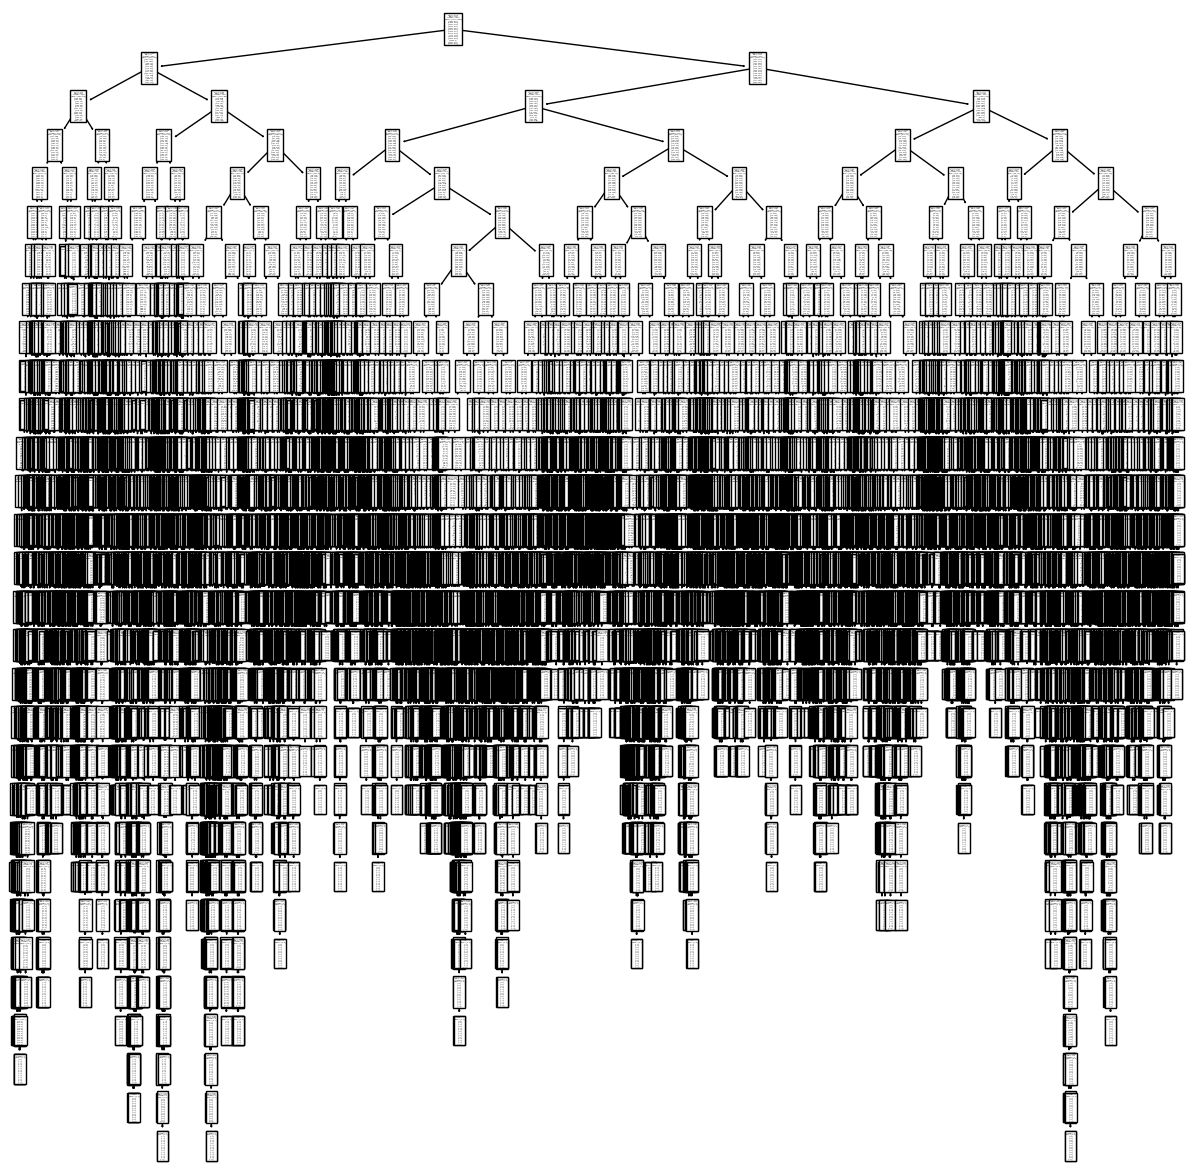

In [23]:
# Running a Decision Tree classifier
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(dt)

In [24]:
# checking the training accuracy score using the cross validation method
y_pred_train=dt.predict(X_train)
print("Train accuracy score: ",cross_val_score(dt, X_train, y_train, cv = 3, scoring="accuracy").mean())

Train accuracy score:  0.3979458450046685


### Training set accuracy score  0.3979458450046685

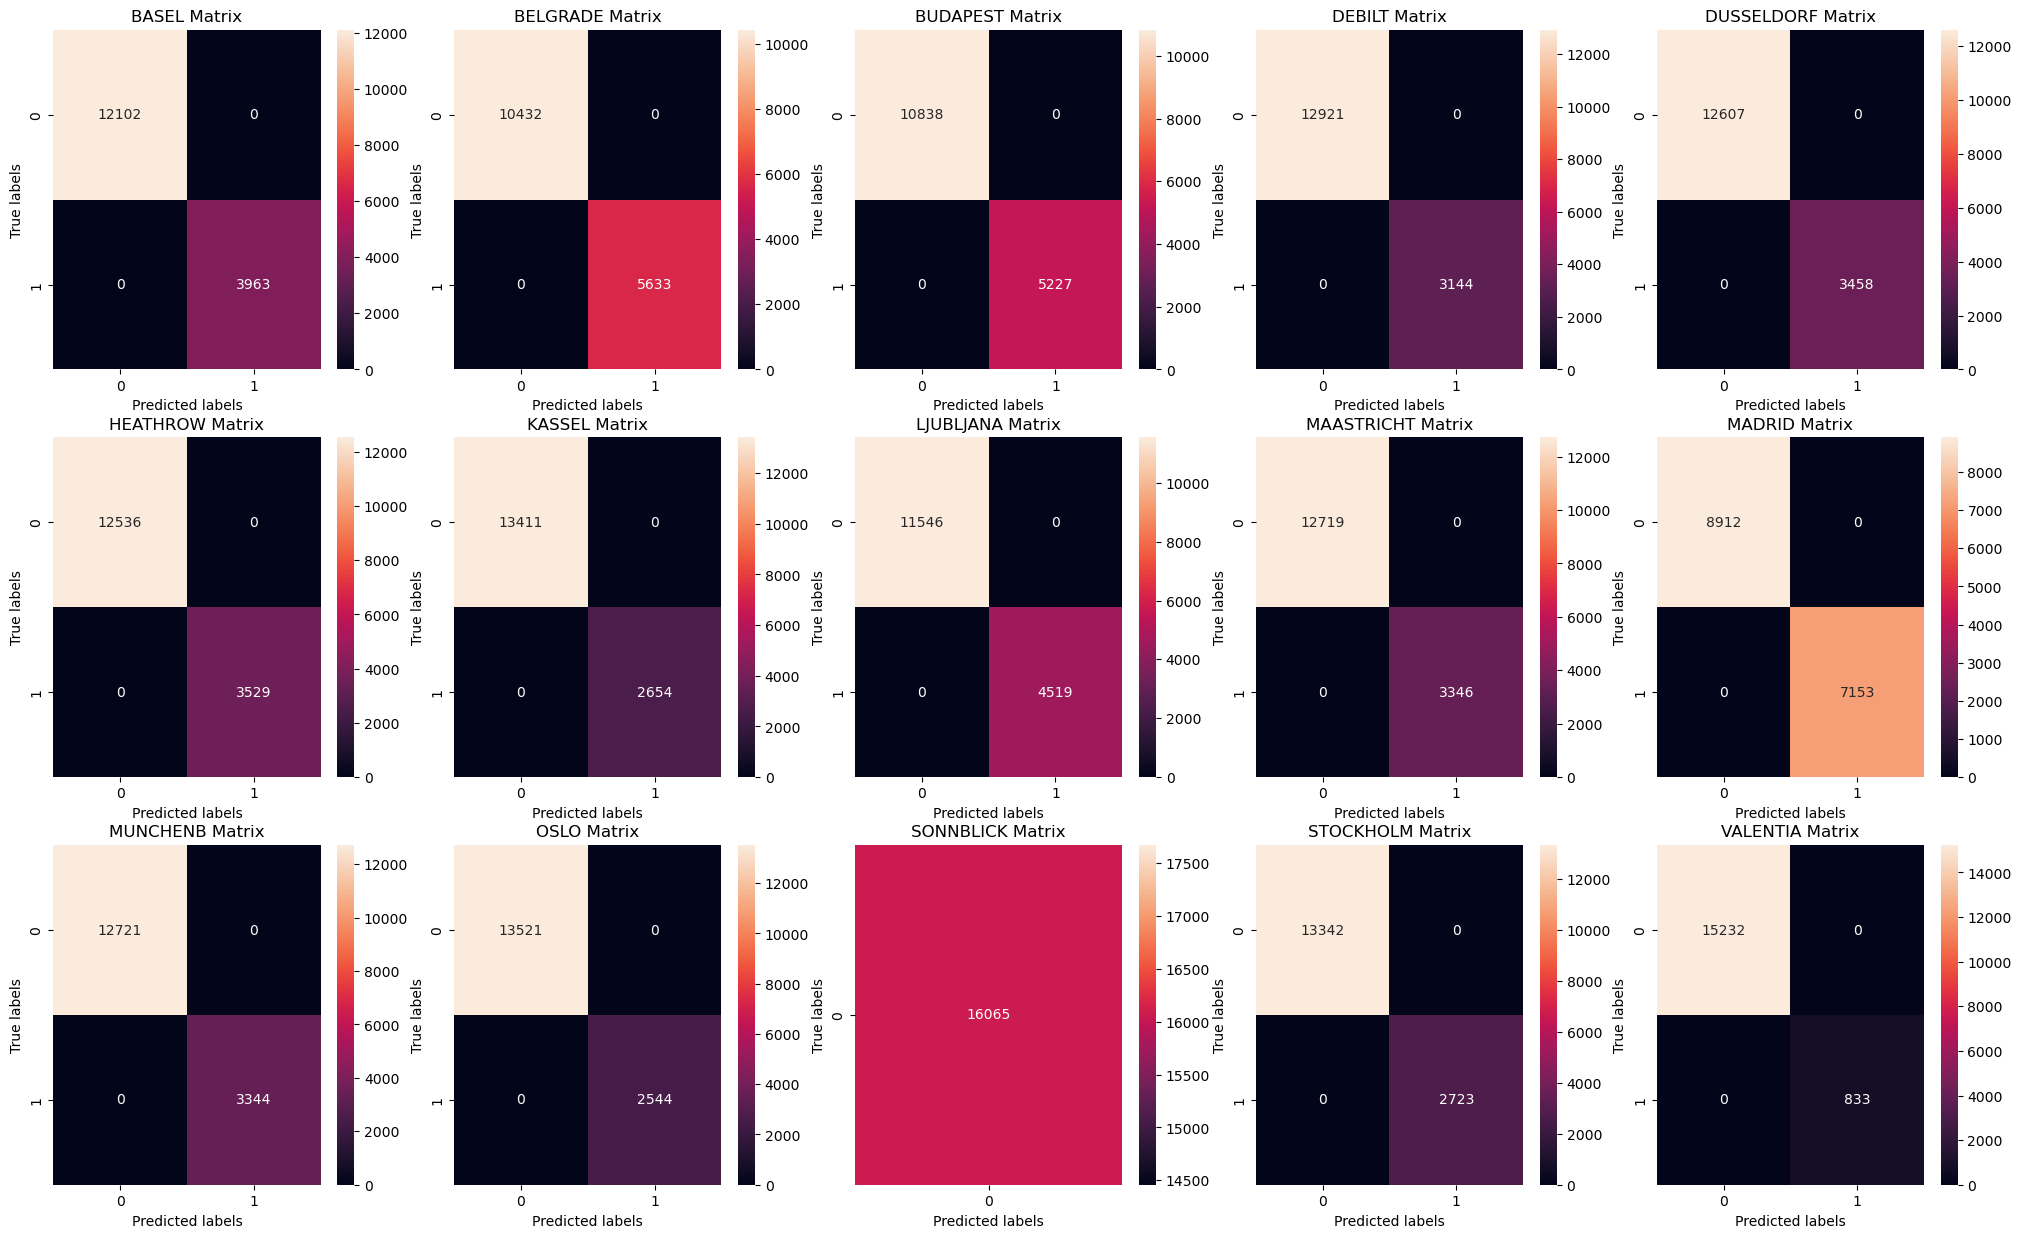

In [27]:
# creating a confusion matrix for the training set based on the last "k" in the sequence, ftm='g' to disable scientific notation
locations = list({x.split("_")[0] for x in d_a.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ["pleasant", "unpleasant"]   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel("Predicted labels");
        ax[i,j].set_ylabel("True labels"); 
        ax[i,j].set_title(name +" Matrix"); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels); 
        count+=1

In [28]:
# checking what the testing accuracy score is using the cross validation method
y_pred=dt.predict(X_test)
print("Test accuracy score: ",accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.40508351488743644


array([[[4528,  656],
        [ 716,  985]],

       [[3774,  752],
        [ 723, 1636]],

       [[3972,  709],
        [ 664, 1540]],

       [[4994,  576],
        [ 581,  734]],

       [[4741,  668],
        [ 685,  791]],

       [[4779,  676],
        [ 704,  726]],

       [[5240,  525],
        [ 502,  618]],

       [[4287,  741],
        [ 674, 1183]],

       [[4906,  559],
        [ 588,  832]],

       [[3213,  578],
        [ 626, 2468]],

       [[4866,  596],
        [ 620,  803]],

       [[5402,  448],
        [ 455,  580]],

       [[6885,    0],
        [   0,    0]],

       [[5271,  443],
        [ 471,  700]],

       [[6306,  238],
        [ 259,   82]]], dtype=int64)

### Testing set accuracy score:  0.40508351488743644

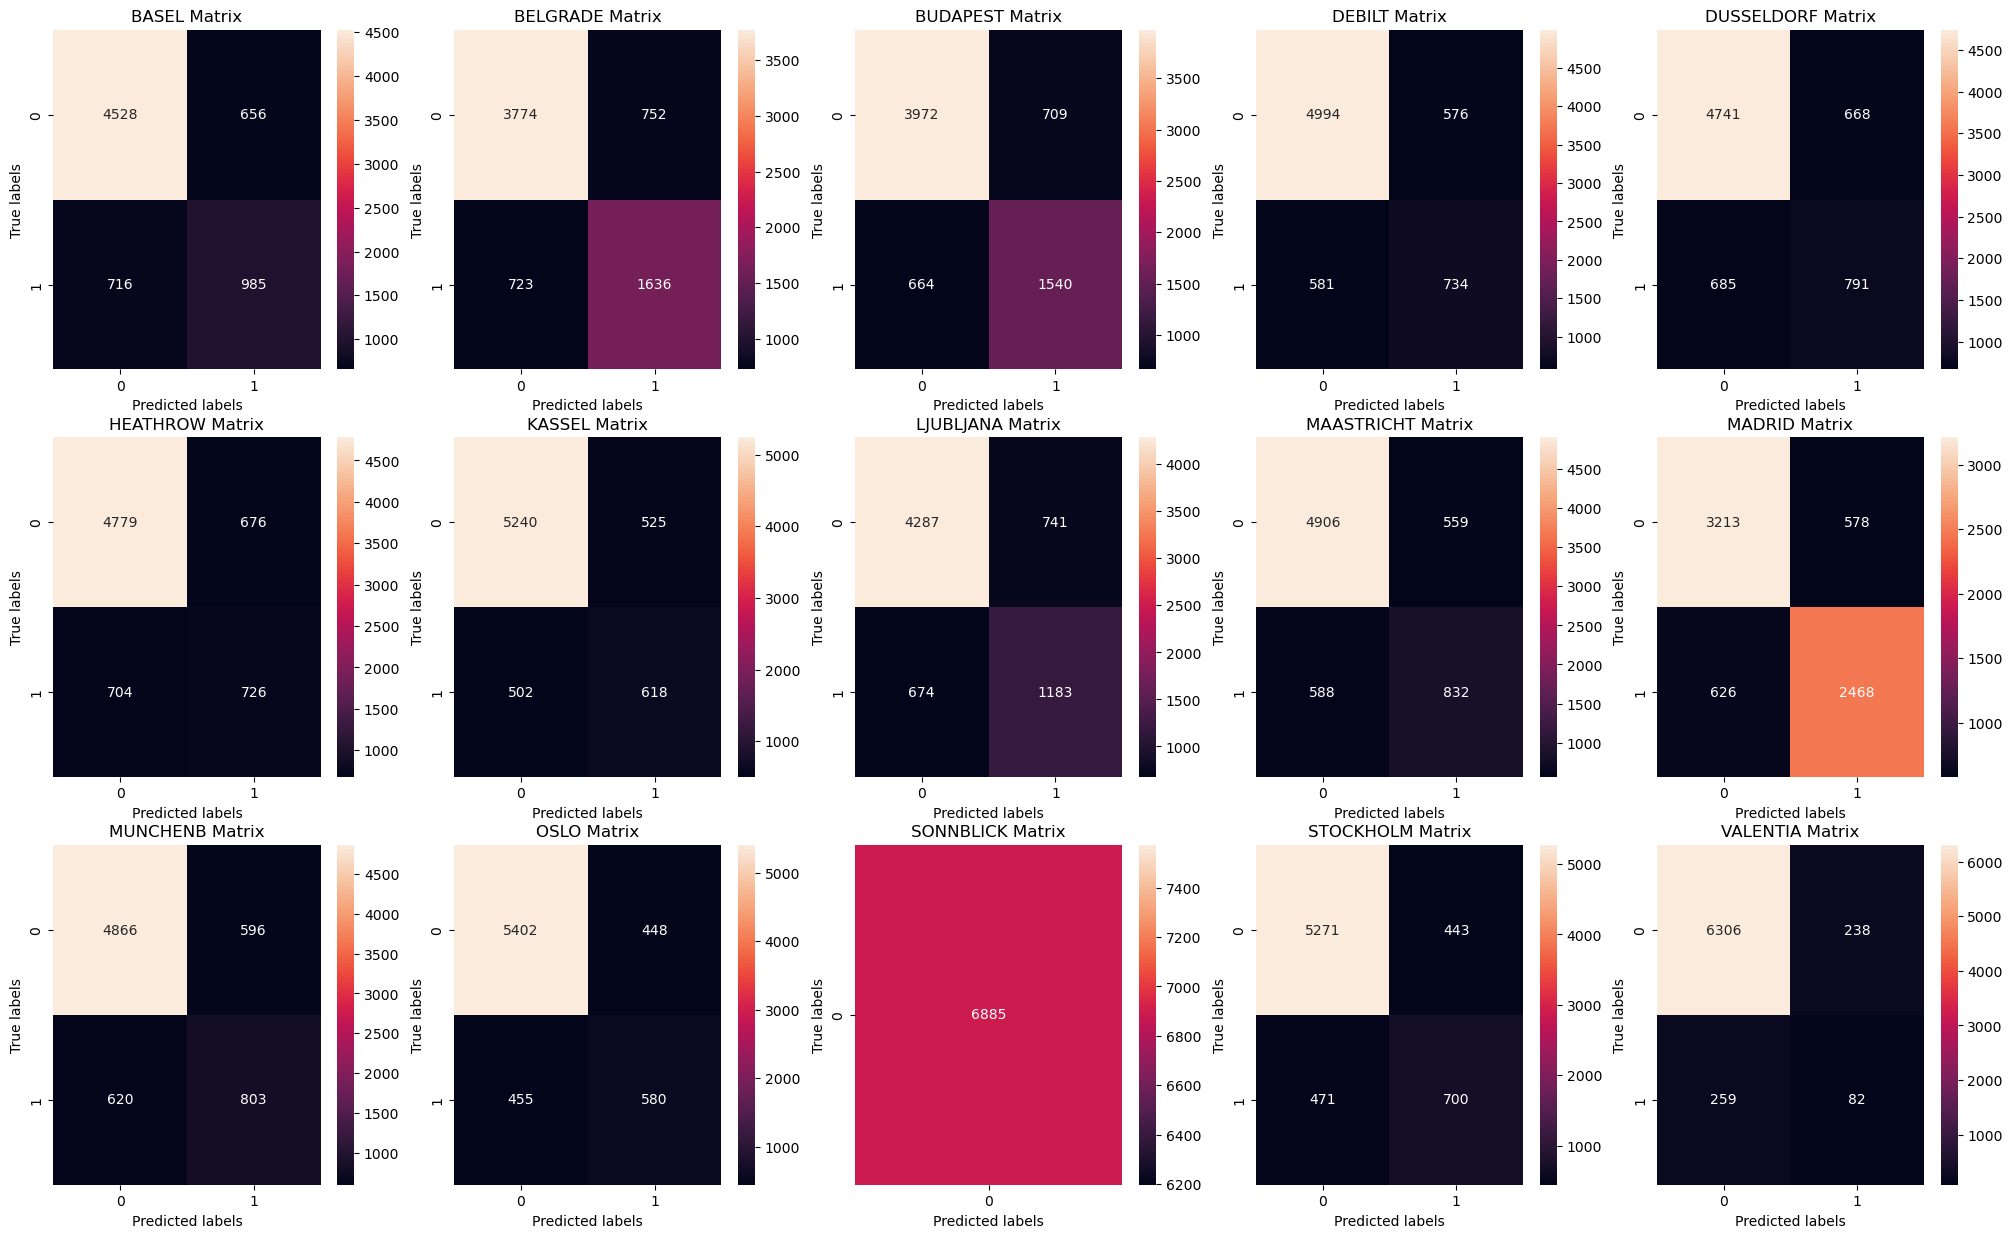

In [29]:
# creating a confusion matrix for the testing set based on the last "k" in the sequence, ftm='g' to disable scientific notation
locations = list({x.split("_")[0] for x in d_a.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ["pleasant", "unpleasant"]   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel("Predicted labels");
        ax[i,j].set_ylabel("True labels"); 
        ax[i,j].set_title(name +" Matrix"); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels); 
        count+=1

# Artificial Neural Network

## Importing libs needed

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

## Scaling the data

In [32]:
# importing the unsclaed dataset
path2=r"C:\Users\Sam\Desktop\CF\Machine Learning\Achievment 1\DataSets\Dataset-weather-prediction-dataset-processed.csv"

In [33]:
d_unscaled=pd.read_csv(path2)

In [35]:
# checking for execution
d_unscaled.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


In [37]:
d_unscaled_final=d_unscaled.drop(columns=["DATE","MONTH"])

In [38]:
# checking for execution
d_unscaled_final.head(1)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9


In [39]:
# dropping the stations that dont have sufficient information
data_unscaled=d_unscaled_final[['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [40]:
# checking for execution
data_unscaled.head(1)

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5


In [42]:
data.head(1)

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.98828,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215


In [43]:
# creating a matrix for unscaled data and weather stations answers
XU=data_unscaled
y=d_a

In [44]:
# checking shape
print(XU.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [45]:
# Splitting data into training and testing sets with 30 to 70 ratio
XU_train, XU_test, y_train, y_test = train_test_split(XU, y, random_state=42, test_size=0.3)

In [46]:
# checking shapes of test and train sets
print(XU_train.shape)
print(XU_test.shape)
print(y_train.shape)
print(y_test.shape)

(16065, 15)
(6885, 15)
(16065, 15)
(6885, 15)


In [47]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(XU_train)

#Scaling the X data
XU_train_sc = scaler.transform(XU_train)
XU_test_sc = scaler.transform(XU_test)

print(XU_train_sc[:5])

[[ 1.36702729  1.26169879  1.15451988  1.36238673  1.6969931   1.55875552
   1.53749439  1.18098444  1.70858299  1.81561214  1.27464267  1.15797688
   1.58324695  1.30968527 -0.01491551]
 [ 0.17372267 -0.24907179 -0.23438652 -0.1367528   0.09349904 -0.00717304
   0.38414856 -0.23608425 -0.10279738 -0.16886347  0.20745237 -0.26249301
  -0.15486027 -0.5442111  -0.01491551]
 [ 0.26864463 -0.20363508 -0.14022337  0.39978135  0.44656195  0.68879521
   0.31021613  0.115155    0.55588639  0.47912856  0.19489719  0.16243388
   0.06422887  0.10278629  1.2754488 ]
 [-0.70769551 -0.5444104  -0.787595   -0.97311485 -1.24519784 -1.06852463
  -1.44937559 -0.68421709 -1.01597261 -1.26235003 -0.77185167 -1.1851914
  -0.49079696 -0.88015205 -0.01491551]
 [-0.73481607  0.27345036 -0.24615691 -0.81531069 -0.86271302 -1.01632701
  -0.73962431 -0.29664274 -0.76148116 -0.58735833 -0.98528973 -0.52958991
  -0.76830988 -0.38246175 -0.49505107]]


In [49]:
#Assign the scaled data to DataFrames
XU_train_df = pd.DataFrame(XU_train_sc, index=XU_train.index, columns=XU_train.columns)
XU_test_df = pd.DataFrame(XU_test_sc, index=XU_test.index, columns=XU_test.columns)

In [57]:
XU.columns

Index(['BASEL_temp_mean', 'BELGRADE_temp_mean', 'BUDAPEST_temp_mean',
       'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean',
       'KASSEL_temp_mean', 'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean',
       'MADRID_temp_mean', 'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean', 'VALENTIA_temp_mean'],
      dtype='object')

C:\Users\Sam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

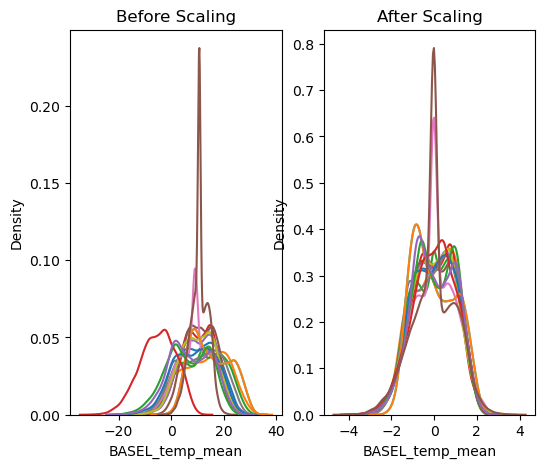

In [59]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(XU_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['BELGRADE_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['BUDAPEST_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['DEBILT_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['DUSSELDORF_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['HEATHROW_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['KASSEL_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['LJUBLJANA_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['MAASTRICHT_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['MADRID_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['MUNCHENB_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['MADRID_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['OSLO_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['SONNBLICK_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['STOCKHOLM_temp_mean'], ax=ax1)
sns.kdeplot(XU_train['VALENTIA_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(XU_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['BELGRADE_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['BUDAPEST_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['DEBILT_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['DUSSELDORF_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['HEATHROW_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['KASSEL_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['LJUBLJANA_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['MAASTRICHT_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['MADRID_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['MUNCHENB_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['MADRID_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['OSLO_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['SONNBLICK_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['STOCKHOLM_temp_mean'], ax=ax2)
sns.kdeplot(XU_train_df['VALENTIA_temp_mean'], ax=ax2)
plt.show()

## Before scaling the mean temp seems to be between 0 and 20 after scaling the mean temperature is between -2 and 2. In this case scaling makes a huge difference. I will be using the unscaled data for ANN.

In [60]:
#Creating ANN with 2 hidden layers 5 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(XU_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [71]:
# printing the accuracy of ANN scaled data
y_pred_s = mlp.predict(XU_train_sc)
print(accuracy_score(y_pred, y_train))
y_pred_test_s = mlp.predict(X_test_sc)
print(accuracy_score(y_pred_test, y_test))

0.4276377217553688
0.43413217138707333


C:\Users\Sam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\Sam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


## unsclaed data seems to be about 3% more accurate both for training and testing sets

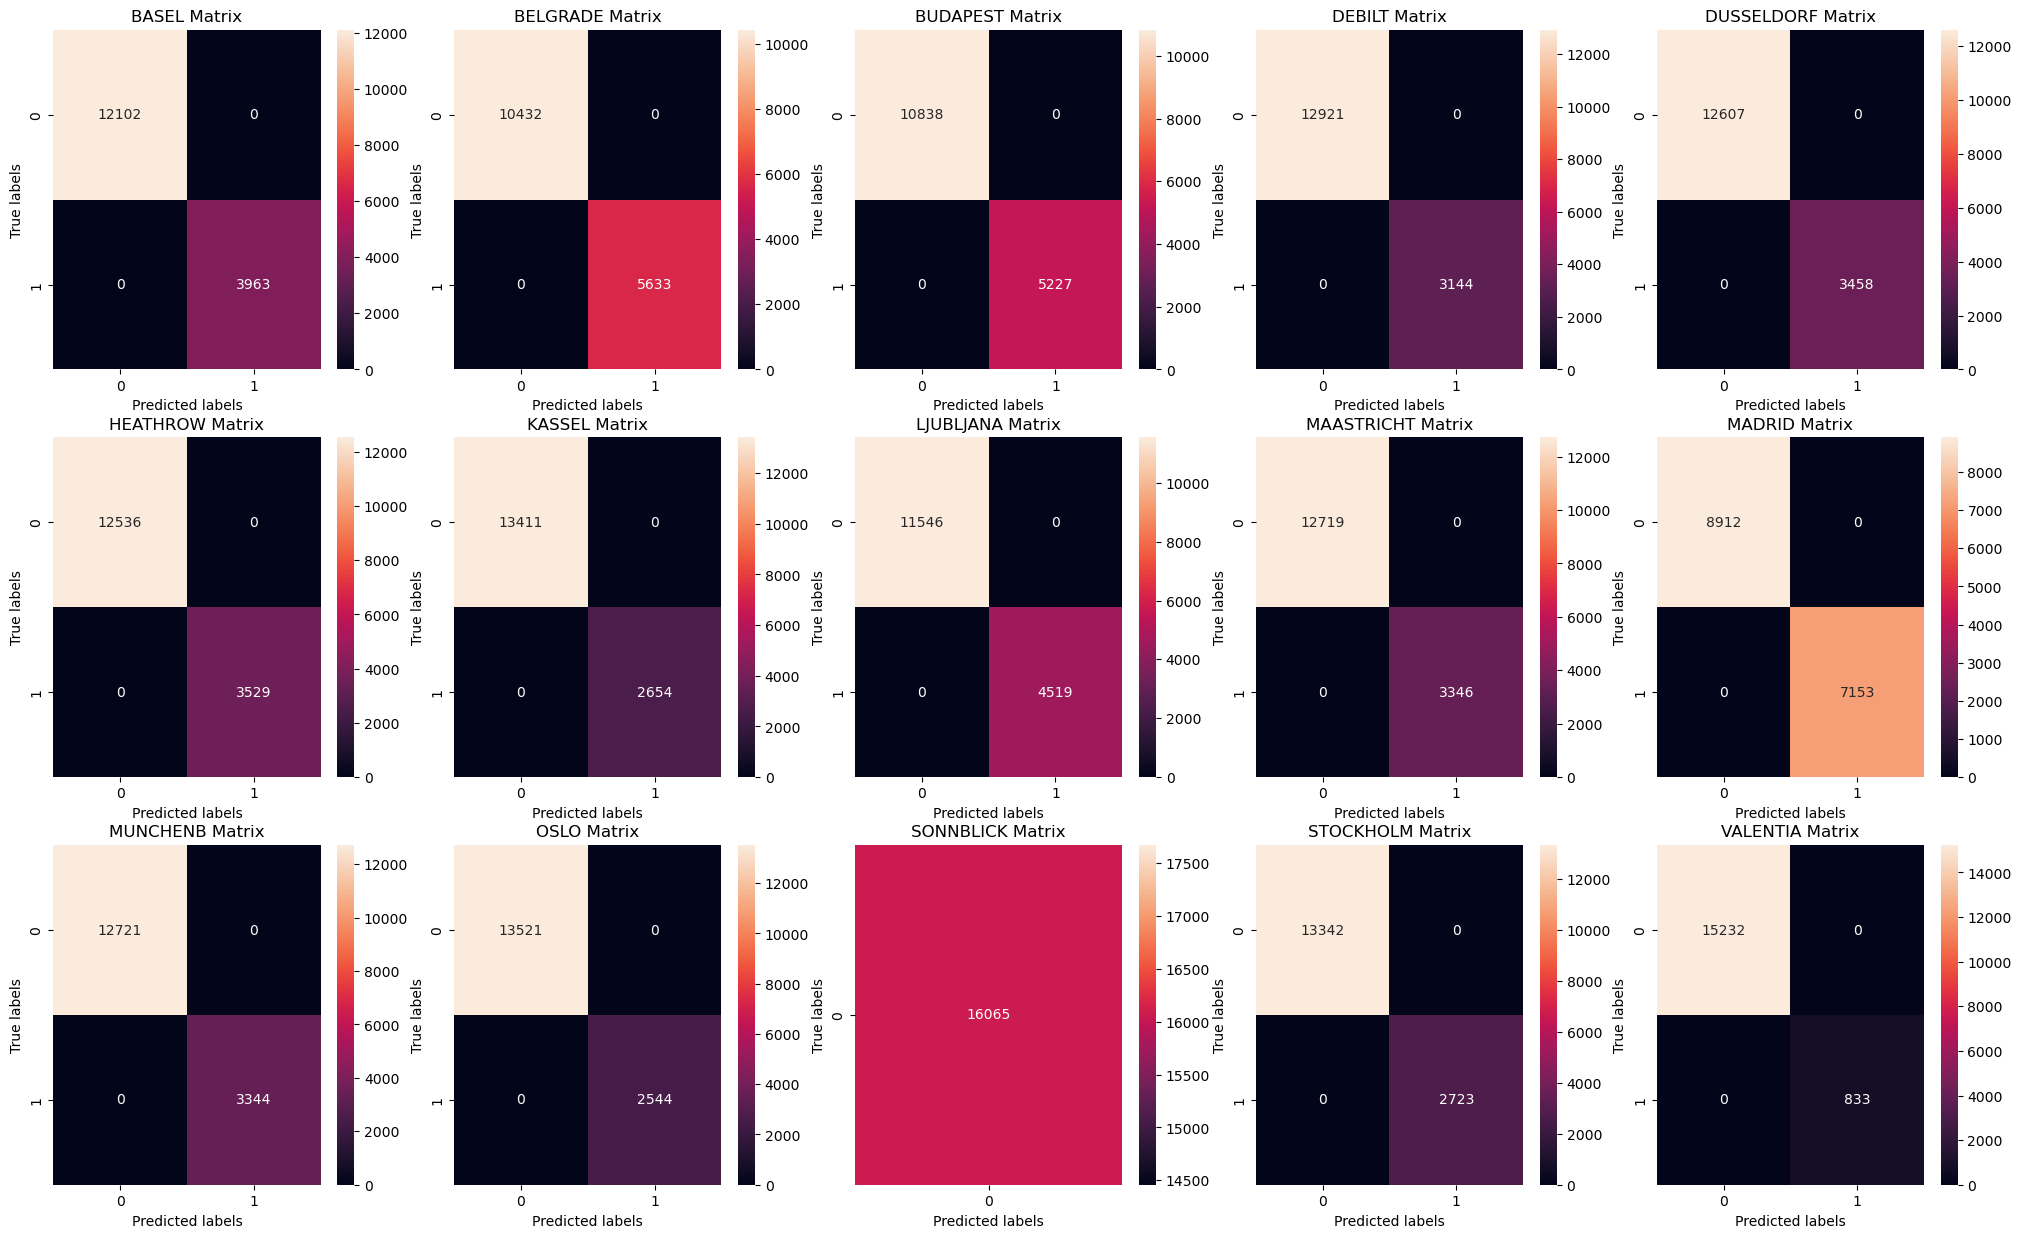

In [73]:
# creating a confusion matrix for the training set based on the last "k" in the sequence, ftm='g' to disable scientific notation
locations = list({x.split("_")[0] for x in d_a.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ["pleasant", "unpleasant"]   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel("Predicted labels");
        ax[i,j].set_ylabel("True labels"); 
        ax[i,j].set_title(name +" Matrix");
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels); 
        count+=1

In [76]:
#Create the ANN with 2 hidden layers 10 nodes and 5 nodes
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(XU_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [77]:
y_pred = mlp.predict(XU_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(XU_test)
print(accuracy_score(y_pred_test, y_test))

0.44394646747587924
0.4501089324618736


## only 2% higher

In [78]:
#Create the ANN with 3 hidden layers 20, 10, and 10 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(XU_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [79]:
y_pred = mlp.predict(XU_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(XU_test)
print(accuracy_score(y_pred_test, y_test))

0.4440709617180205
0.44996368917937546


In [80]:
#Create the ANN with 3 hidden layers 100, 50, and 25 nodes
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(XU_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000)

In [82]:
y_pred = mlp.predict(XU_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(XU_test)
print(accuracy_score(y_pred_test, y_test))

0.4740740740740741
0.4549019607843137


In [83]:
#Creating the ANN with the same 3 hidden layers but decided to bump the max iterations to see the difference
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=10000, tol=0.0001)
#Fit the data to the model
mlp.fit(XU_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=10000)

In [84]:
y_pred = mlp.predict(XU_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(XU_test)
print(accuracy_score(y_pred_test, y_test))

0.4670401493930906
0.4492374727668845


In [85]:
#Create the ANN with 3 hidden layers 100 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, tol=0.0001)
#Fit the data to the model
mlp.fit(XU_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000)

In [86]:
y_pred = mlp.predict(XU_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(XU_test)
print(accuracy_score(y_pred_test, y_test))

0.5399315281668223
0.43602033405954976


In [87]:
#Create the ANN with 3 hidden layers 1000, 100, and 100 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(1000, 100, 100), max_iter=10000, tol=0.0001)
#Fit the data to the model
mlp.fit(XU_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000, 100, 100), max_iter=10000)

In [88]:
y_pred = mlp.predict(XU_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(XU_test)
print(accuracy_score(y_pred_test, y_test))

0.6004979769685652
0.4290486564996369


## An Arificial Neural Network with three hidden layers 1000, 100 and 100 nodes each, with 10000 max iterations seems to produce the most accurate results 60% for the training set and about 43% for the testing set.

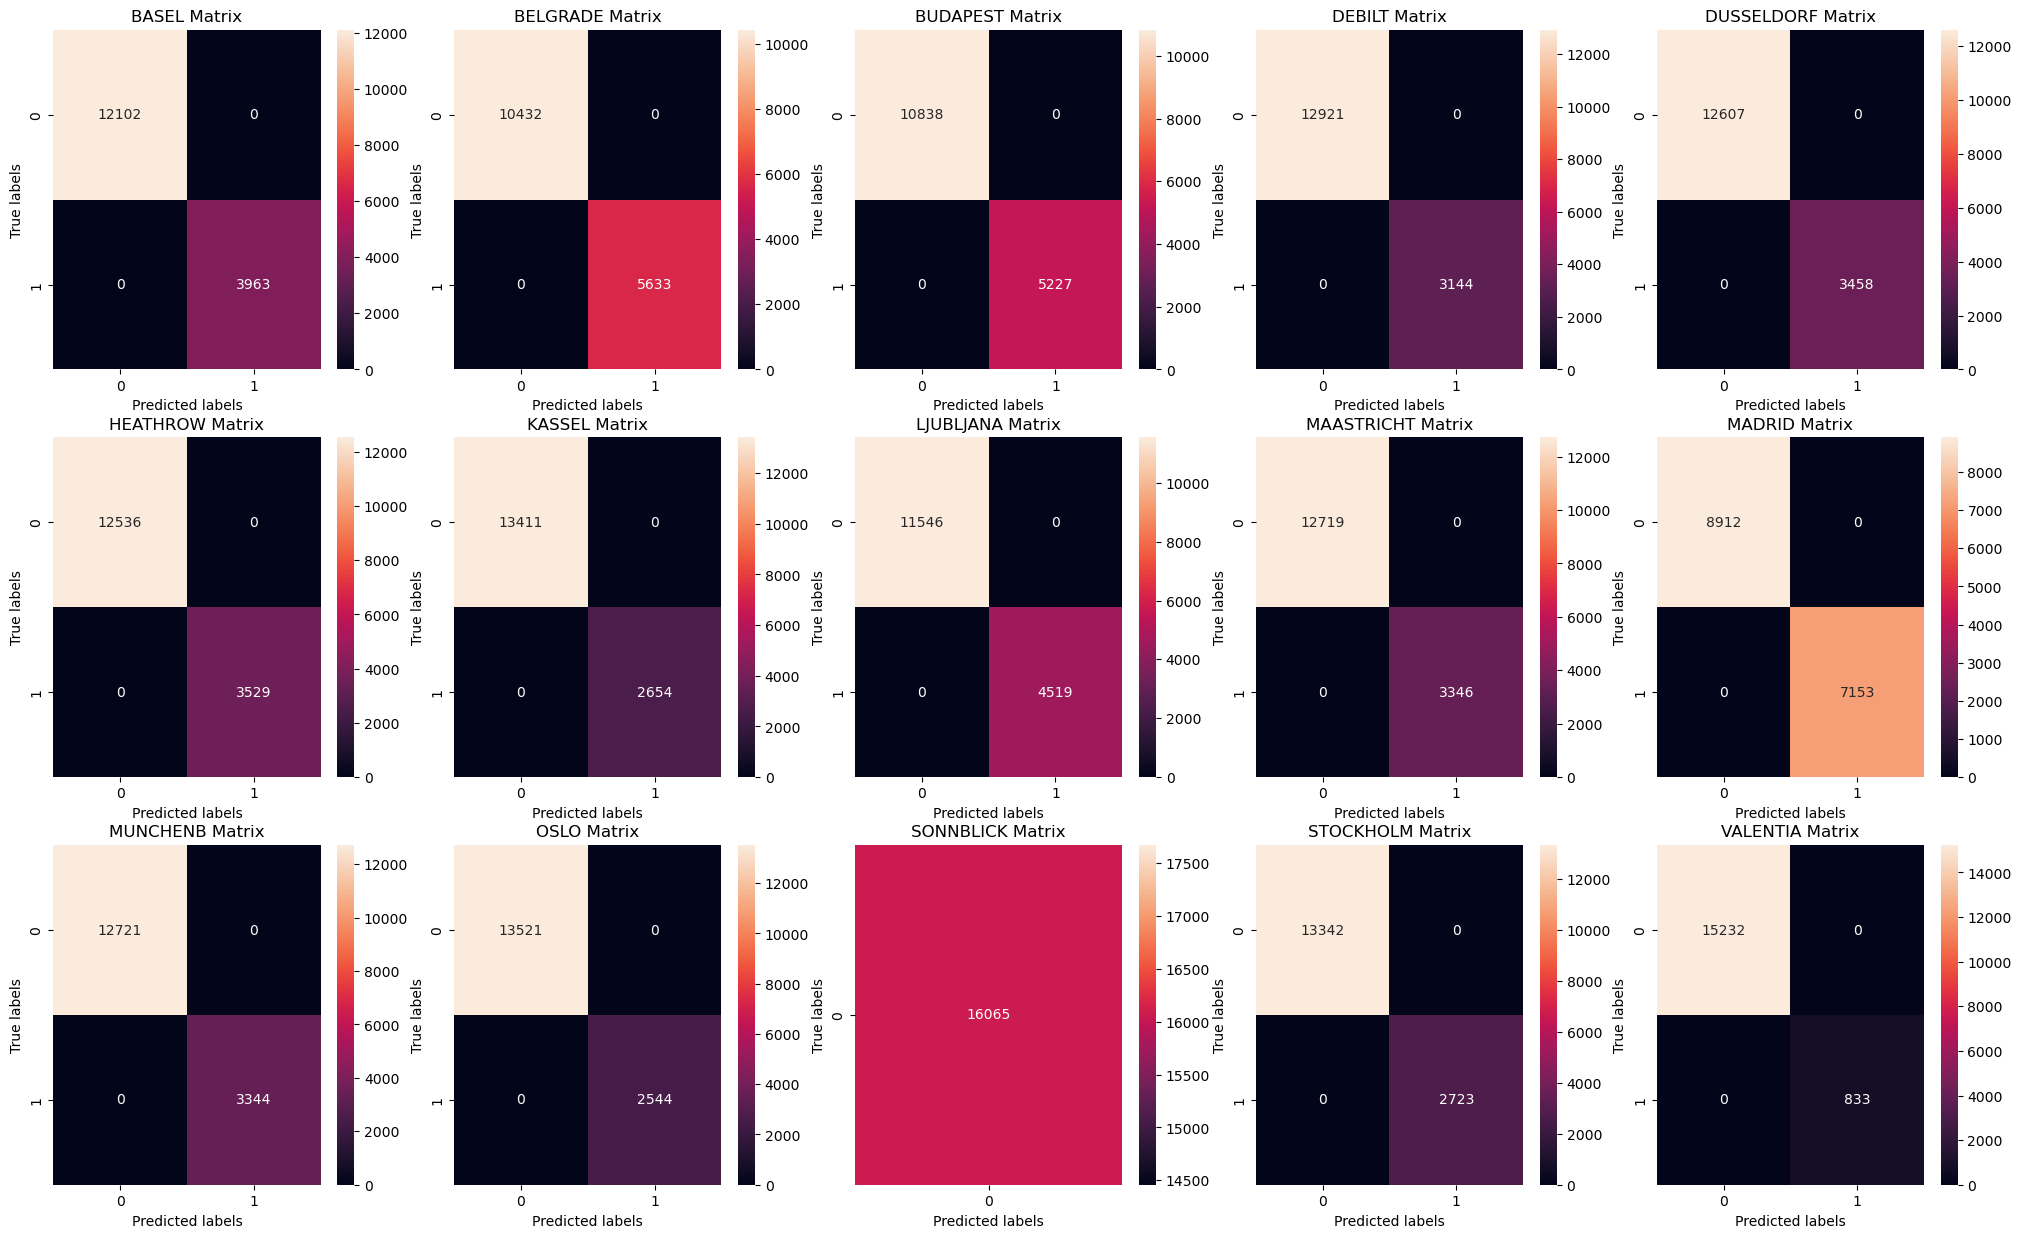

In [91]:
# creating a confusion matrix for the training set based on the last "k" in the sequence, ftm='g' to disable scientific notation
locations = list({x.split("_")[0] for x in d_a.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ["pleasant", "unpleasant"]   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel("Predicted labels");
        ax[i,j].set_ylabel("True labels"); 
        ax[i,j].set_title(name +" Matrix");
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels); 
        count+=1